In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


### Importing dependencies

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from seaborn import heatmap
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import plotly.express as px

### Reading the Dataset and seeing the datapoints

In [ ]:
dataset = pd.read_csv("/content/gdrive/My Drive/Dataset/fraudTrain_new.csv")
dataset.shape

(1296675, 23)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1295371 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

### Exploring the dataset's rows and columns

In [ ]:
dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Unbalaced dataset

In [ ]:
labels=["Genuine","Fraud"]

fraud_or_not = dataset["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=dataset['is_fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

### Data pre-processing

In [ ]:
dataset.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,1304
first,0
last,0
gender,0
street,0


###  Handling with Null values

In [ ]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(dataset[['amt']])
dataset['amt'] = impute.transform(dataset[['amt']])

In [ ]:
dataset.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


###  Handling with Catagorical values

In [ ]:
object_cols = dataset.select_dtypes(include=['object']).columns
for col in object_cols:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])

In [ ]:
dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2703186189652095,514,8,4.97,162,18,0,568,...,36.0788,-81.1781,3495,370,779,56438,1325376018,36.011293,-82.048315,0
1,1,1,630423337322,241,4,107.23,309,157,0,435,...,48.8878,-118.2105,149,428,607,159395,1325376044,49.159047,-118.186462,0
2,2,2,38859492057661,390,0,220.11,115,381,1,602,...,42.1808,-112.2620,4154,307,302,818703,1325376051,43.150704,-112.154481,0
3,3,3,3534093764340240,360,2,45.00,163,463,1,930,...,46.2306,-112.1138,1939,328,397,544575,1325376076,47.034331,-112.561071,0
4,4,4,375534208663984,297,9,41.96,336,149,1,418,...,38.4207,-79.4629,99,116,734,831111,1325376186,38.674999,-78.632459,0


In [ ]:
dataset['is_fraud'].value_counts()

,count
is_fraud,
0,1289169
1,7506


### Correlation of all the features

In [ ]:
corr = dataset.corr()
corr

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000e+00,9.999995e-01,0.000386,-0.000972,0.000250,-0.000272,0.000509,0.000121,-0.000945,-0.001067,...,0.000602,-0.000676,-0.001678,-7.800295e-07,0.003712,-0.000595,0.998971,0.000541,-0.000671,-0.004767
trans_date_trans_time,9.999995e-01,1.000000e+00,0.000385,-0.000972,0.000249,-0.000273,0.000509,0.000121,-0.000946,-0.001066,...,0.000601,-0.000676,-0.001679,2.072173e-07,0.003709,-0.000596,0.999007,0.000540,-0.000671,-0.004777
cc_num,3.857663e-04,3.850884e-04,1.000000,0.000055,0.001230,0.001765,-0.027189,0.006908,0.001112,0.046509,...,-0.059271,-0.048278,-0.008991,2.916472e-02,0.002397,0.001415,0.000354,-0.058942,-0.048252,-0.000981
merchant,-9.718206e-04,-9.722603e-04,0.000055,1.000000,0.032302,-0.002620,-0.001576,-0.000439,-0.000915,0.000718,...,-0.002266,-0.000697,0.001911,1.360387e-03,0.006798,-0.000459,-0.000999,-0.002263,-0.000673,-0.000536
category,2.495622e-04,2.493803e-04,0.001230,0.032302,1.000000,0.030868,-0.001931,-0.004319,-0.028259,0.002258,...,-0.008660,-0.000767,0.009386,3.490427e-03,0.004347,-0.000356,0.000182,-0.008519,-0.000736,0.020205
amt,-2.718565e-04,-2.732293e-04,0.001765,-0.002620,0.030868,1.000000,-0.003587,-0.004706,0.001053,0.001322,...,-0.001952,-0.000198,0.005789,-5.980919e-04,0.010630,-0.001307,-0.000315,-0.001897,-0.000162,0.219318
first,5.093514e-04,5.086892e-04,-0.027189,-0.001576,-0.001931,-0.003587,1.000000,-0.056983,0.015197,-0.045369,...,0.131869,-0.016475,-0.066607,-3.968275e-02,0.004203,0.000878,0.000483,0.130964,-0.016489,-0.003219
last,1.213636e-04,1.214824e-04,0.006908,-0.000439,-0.004319,-0.004706,-0.056983,1.000000,0.043740,0.005634,...,-0.034915,-0.025557,-0.012039,-2.459638e-02,-0.019168,0.000153,0.000094,-0.034548,-0.025557,-0.000096
gender,-9.450357e-04,-9.457053e-04,0.001112,-0.000915,-0.028259,0.001053,0.015197,0.043740,1.000000,0.042679,...,0.042935,0.050404,-0.028649,-7.990836e-02,-0.012185,-0.000289,-0.000960,0.042645,0.050350,0.007642
street,-1.066586e-03,-1.066480e-03,0.046509,0.000718,0.002258,0.001322,-0.045369,0.005634,0.042679,1.000000,...,-0.012651,0.071328,-0.012530,-2.022876e-02,-0.042514,-0.001430,-0.001089,-0.012517,0.071286,0.001448


<Axes: >

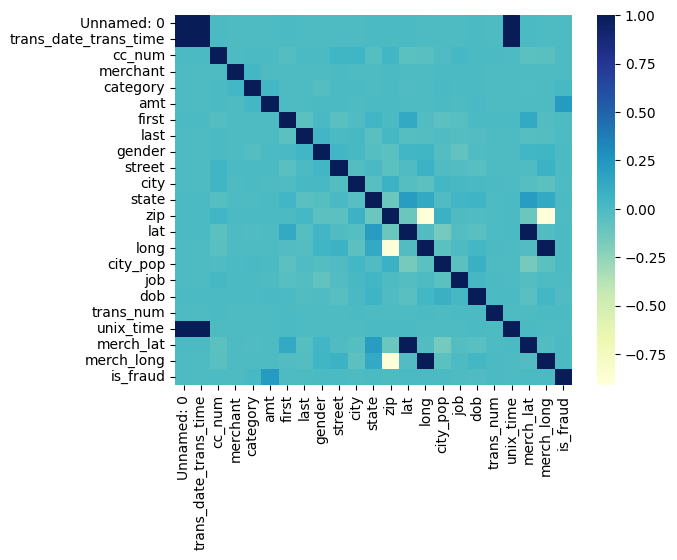

In [ ]:
sns.heatmap(corr, cmap = 'YlGnBu')

### Feature scaling

In [ ]:
train_df = dataset.drop(["Unnamed: 0", "gender", "first", "last", "street", "city", "state", "zip", "dob","trans_num"], axis=1)

### Spliting the dataset

In [ ]:
X = train_df.drop("is_fraud",axis=1).values
y = train_df["is_fraud"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=2)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (907672, 12)
y_train shape: (907672,)


In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (389003, 12)
y_test shape: (389003,)


### Scaling the data

In [ ]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Applying KNN on our dataset

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
knn_old_training = accuracy_score(y_train, knn.predict(X_train))
knn_old_test = accuracy_score(y_test, y_pred)
print(f'Training Accuracy: {knn_old_training}')
print(f'Testing Accuracy: {knn_old_test}')

Training Accuracy: 1.0
Testing Accuracy: 0.9947044110199664


In [ ]:
report = classification_report(y_test, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, pos_label=1)
knn_old_Precision = precision[1]
knn_old_Recall = recall[1]
print('Precision:', knn_old_Precision)
print('Recall:', knn_old_Recall)
print(f"F1: {f1[0]}")
# print(f"Support : {support[0]}")

Precision: 0.547713717693837
Recall: 0.48934280639431615
F1: 0.997337613829933


In [ ]:
knn_cm = confusion_matrix(y_test, y_pred)
print(knn_cm)

[[385841    910]
 [  1150   1102]]


<Axes: >

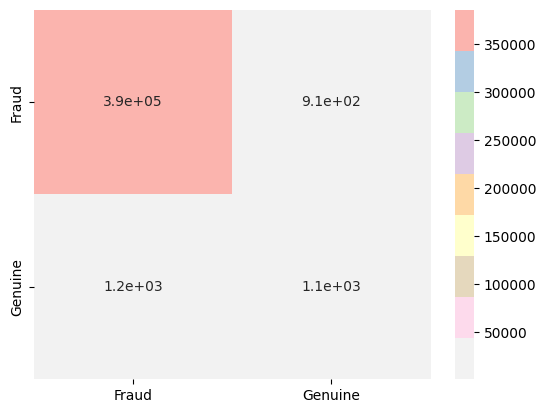

In [ ]:
sns.heatmap(knn_cm, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Genuine'],yticklabels=['Fraud' ,'Genuine'])

### Applying LogisticRegression on our dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
X_train_prediction = model.predict(X_train)
logi_old_training_data_accuracy = accuracy_score(X_train_prediction, y_train)
X_test_prediction = model.predict(X_test)
logi_old_test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy on Training data : ', logi_old_training_data_accuracy)
print('Accuracy score on Test Data : ', logi_old_test_data_accuracy)

Accuracy on Training data :  0.9936463832750156
Accuracy score on Test Data :  0.9937352668231351


In [ ]:
report = classification_report(y_test, X_test_prediction)
precision, recall, f1, support = precision_recall_fscore_support(y_test, X_test_prediction, pos_label=1)
logi_old_Precision = precision[1]
logi_old_Recall = recall[1]
print('Precision:', logi_old_Precision)
print('Recall:', logi_old_Recall)
print(f"F1: {f1[0]}")

Precision: 0.0
Recall: 0.0
F1: 0.9968577908606455


In [ ]:
logi_cm_old = confusion_matrix(y_test, X_test_prediction)
print(logi_cm_old)

[[386566    185]
 [  2252      0]]


<Axes: >

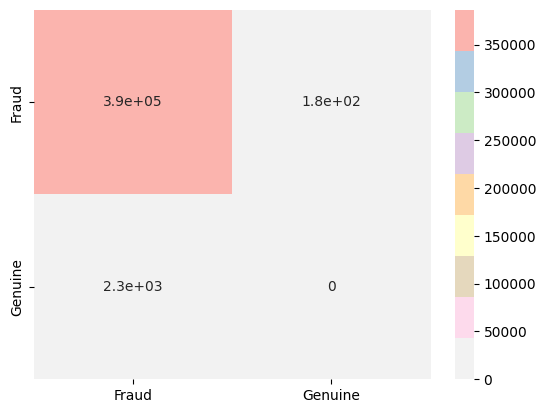

In [ ]:
sns.heatmap(logi_cm_old, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Genuine'],yticklabels=['Fraud' ,'Genuine'])

### Applying Naive Bayes on our dataset

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
gnb_old_training = gnb.score(X_train, y_train)
gnb_old_test = gnb.score(X_test, y_test)
print("Training accuracy of the model is {:.2f}".format(gnb_old_training))
print("Testing accuracy of the model is {:.2f}".format(gnb_old_test))

Training accuracy of the model is 0.99
Testing accuracy of the model is 0.99


In [ ]:
y_pred = gnb.predict(X_test)
report = classification_report(y_test, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, pos_label=1)
gnb_old_Precision = precision[1]
gnb_old_Recall = recall[1]
print('Precision:', gnb_old_Precision)
print('Recall:', gnb_old_Recall)
print(f"F1: {f1[0]}")

Precision: 0.2328972764314819
Recall: 0.4822380106571936
F1: 0.9938489750237002


In [ ]:
predictions = gnb.predict(X_test)
gnb_old_new=confusion_matrix(predictions, y_test)
print(gnb_old_new)

[[383174   1166]
 [  3577   1086]]


<Axes: >

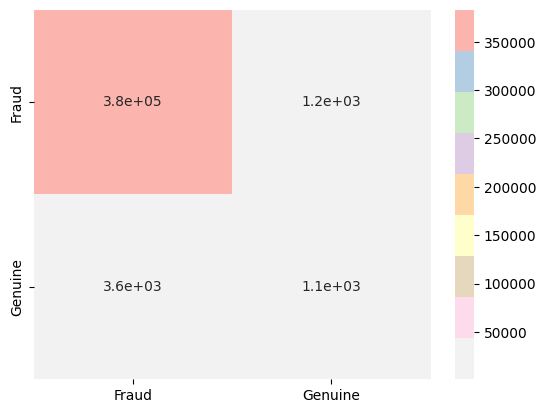

In [ ]:
sns.heatmap(gnb_old_new, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Genuine'],yticklabels=['Fraud' ,'Genuine'])

### Over sampling the dataset

In [ ]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



In [ ]:
pd.Series(y_resampled).value_counts()

,count
0,1289169
1,1289169


### Under sampaling the dataset

In [ ]:
legit = dataset[dataset.is_fraud==0]
fraud = dataset[dataset.is_fraud==1]
print(legit.shape)
print(fraud.shape)

(1289169, 23)
(7506, 23)


In [ ]:
legit.amt.describe()

,amt
count,1.289169e+06
mean,6.767254e+01
std,1.539767e+02
min,1.000000e+00
25%,9.620000e+00
50%,4.735000e+01
75%,8.250000e+01
max,2.894890e+04


In [ ]:
fraud.amt.describe()

,amt
count,7506.000000
mean,531.046059
std,390.582727
min,1.060000
25%,243.675000
50%,394.605000
75%,900.845000
max,1376.040000


In [ ]:
dataset.groupby('is_fraud').mean()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,648473.169029,637869.085510,4.172901e+17,342.866719,6.221754,67.672544,180.286326,250.521925,0.452261,488.003463,...,48805.107481,38.536888,-90.228142,88775.228137,251.174429,534.481052,648314.024774,1.349249e+09,38.536659,-90.228274
1,624949.724354,614713.598721,4.003577e+17,341.446043,7.264055,531.046059,176.147882,250.348521,0.502398,493.349720,...,48038.714229,38.663609,-89.916041,97276.763256,251.002132,491.620037,652283.036371,1.348389e+09,38.653901,-89.915808


In [ ]:
legitSample = legit.sample(n=7506)

In [ ]:
newDataset = pd.concat([legitSample, fraud], axis = 0)

In [ ]:
newDataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1099970,1099970,1081220,4488941175228467,123,5,40.43,151,452,0,131,...,28.9254,-81.6801,11432,352,735,118057,1364906329,29.921105,-80.776316,0
1035052,1035052,1017316,4149635823017,253,5,66.87,290,124,1,430,...,33.9778,-86.5598,3996,17,596,454294,1362431115,34.237117,-85.727614,0
447536,447536,440696,4384910379661778,27,11,9.86,246,378,0,559,...,46.9777,-96.4092,4508,308,136,1033287,1342594649,46.382717,-96.057972,0
1127253,1127253,1108127,3537797820923602,630,11,7.81,71,284,0,534,...,47.4852,-120.4158,584,293,439,819812,1365917244,48.336656,-119.504461,0
1285082,1285082,1263384,4933461930348832,654,5,75.65,277,65,1,519,...,44.9673,-93.2828,1022298,72,583,684669,1371395999,45.180867,-93.314064,0


In [ ]:
newDataset.groupby('is_fraud').mean()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,654950.209166,644229.168665,3.977127e+17,343.841327,6.253797,68.813140,179.835065,250.666933,0.452705,488.32041,...,48807.502398,38.503170,-90.151520,91038.999067,251.602185,533.652678,653504.908740,1.349461e+09,38.505573,-90.155278
1,624949.724354,614713.598721,4.003577e+17,341.446043,7.264055,531.046059,176.147882,250.348521,0.502398,493.34972,...,48038.714229,38.663609,-89.916041,97276.763256,251.002132,491.620037,652283.036371,1.348389e+09,38.653901,-89.915808


In [ ]:
corr = newDataset.corr()
corr

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.999999,0.013014,0.016861,-0.008298,-0.013318,0.020380,-0.019417,0.009649,-0.001402,...,-0.015594,-0.002922,0.001834,-0.001145,-0.005069,0.009036,0.999004,-0.016065,-0.003077,-0.038608
trans_date_trans_time,0.999999,1.000000,0.013015,0.016855,-0.008312,-0.013350,0.020391,-0.019441,0.009688,-0.001405,...,-0.015587,-0.002902,0.001832,-0.001126,-0.005070,0.009050,0.999040,-0.016059,-0.003058,-0.038663
cc_num,0.013014,0.013015,1.000000,0.010695,0.014533,0.014945,0.018220,0.009940,0.015719,0.015249,...,-0.049655,-0.050424,-0.012152,0.031471,-0.008667,-0.008919,0.013441,-0.049808,-0.050111,0.001033
merchant,0.016861,0.016855,0.010695,1.000000,0.023948,-0.002807,0.004935,-0.002146,0.006112,0.002537,...,0.012110,-0.012885,0.010942,0.006079,0.018801,0.004762,0.016599,0.011536,-0.013000,-0.006073
category,-0.008298,-0.008312,0.014533,0.023948,1.000000,0.439974,-0.006070,0.006246,-0.004638,0.002439,...,-0.008499,0.000785,0.011731,-0.000797,-0.008109,0.008184,-0.009254,-0.008215,0.001728,0.130387
amt,-0.013318,-0.013350,0.014945,-0.002807,0.439974,1.000000,-0.005464,0.003488,0.080833,0.005380,...,0.010782,0.016634,0.016057,-0.018486,-0.067858,-0.000842,-0.014543,0.009611,0.016981,0.619896
first,0.020380,0.020391,0.018220,0.004935,-0.006070,-0.005464,1.000000,-0.064618,0.016484,-0.036213,...,0.115893,-0.033138,-0.030420,-0.038769,0.034809,0.008288,0.019906,0.116075,-0.033769,-0.018987
last,-0.019417,-0.019441,0.009940,-0.002146,0.006246,0.003488,-0.064618,1.000000,0.016598,0.024598,...,-0.024471,0.009119,-0.028639,0.009209,-0.012972,0.004891,-0.020029,-0.025258,0.009381,-0.001161
gender,0.009649,0.009688,0.015719,0.006112,-0.004638,0.080833,0.016484,0.016598,1.000000,0.041183,...,0.061935,0.041137,-0.025233,-0.094542,-0.004863,-0.008045,0.010683,0.061026,0.041470,0.049744
street,-0.001402,-0.001405,0.015249,0.002537,0.002439,0.005380,-0.036213,0.024598,0.041183,1.000000,...,0.019990,0.049111,-0.015221,-0.031963,-0.052731,-0.002009,-0.001848,0.020659,0.049484,0.008939


<Axes: >

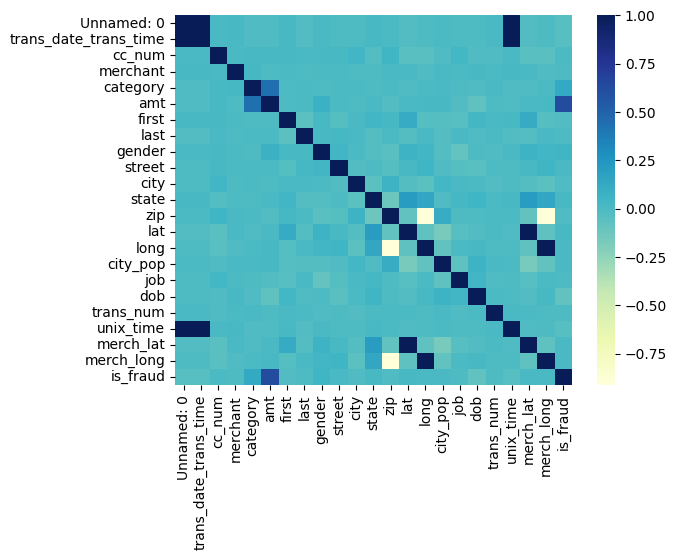

In [ ]:
sns.heatmap(corr, cmap = 'YlGnBu')

In [ ]:
train_df2 = newDataset.drop(["Unnamed: 0", "gender", "first", "last", "street", "city", "state", "zip","dob","trans_num"], axis=1)

In [ ]:
nX = train_df2.drop("is_fraud",axis=1)
ny = train_df2["is_fraud"]
X_trainN, X_testN, y_trainN, y_testN = train_test_split(nX, ny, test_size=0.3,stratify=ny,random_state=2)

In [ ]:
scaler.fit(X_trainN)
print(scaler.mean_)
X_trainN = scaler.transform(X_trainN)
X_testN = scaler.transform(X_testN)

[ 6.28030005e+05  3.90446149e+17  3.44576132e+02  6.76655881e+00
  2.99480438e+02  3.85487405e+01 -9.01322380e+01  9.42237610e+04
  2.52592311e+02  1.34887484e+09  3.85409640e+01 -9.01337663e+01]


### Applying KNN on our under sampled dataset

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_trainN, y_trainN)
y_pred = knn.predict(X_testN)

In [ ]:
knn_new_training = accuracy_score(y_trainN, knn.predict(X_trainN))
knn_new_test = accuracy_score(y_testN, y_pred)
print(f'Training Accuracy: {knn_new_training}')
print(f'Testing Accuracy: {knn_new_test}')

Training Accuracy: 0.905595736581652
Testing Accuracy: 0.8206039076376554


In [ ]:
report = classification_report(y_testN, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_testN, y_pred, pos_label=1)
knn_new_Precision = precision[1]
knn_new_Recall = recall[1]
print('Precision:', knn_new_Precision)
print('Recall:', knn_new_Recall)
print(f"F1: {f1[1]}")

Precision: 0.8351903435468895
Recall: 0.7988454706927176
F1: 0.8166137085792101


In [ ]:
knn_cm_new = confusion_matrix(y_testN, y_pred)
print(knn_cm_new)

[[1897  355]
 [ 453 1799]]


<Axes: >

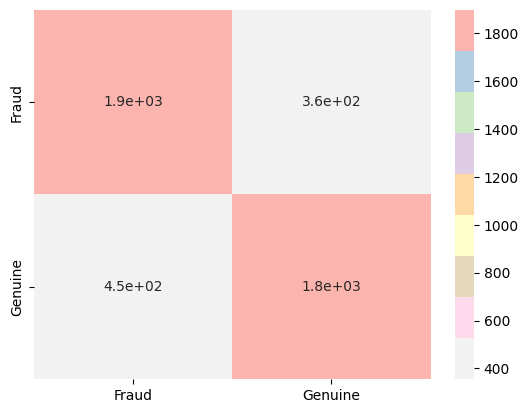

In [ ]:
sns.heatmap(knn_cm_new, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Genuine'],yticklabels=['Fraud' ,'Genuine'])

### Applying LogisticRegression on our under sampled dataset

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_trainN,y_trainN)

LogisticRegression(max_iter=1000)

In [ ]:
X_train_prediction = model.predict(X_trainN)
logi_new_training_data_accuracy = accuracy_score(X_train_prediction, y_trainN)
X_test_prediction = model.predict(X_testN)
logi_new_test_data_accuracy = accuracy_score(X_test_prediction, y_testN)

In [ ]:
print('Accuracy on Training data : ', logi_new_training_data_accuracy)
print('Accuracy score on Test Data : ', logi_new_test_data_accuracy)

Accuracy on Training data :  0.8549676437000381
Accuracy score on Test Data :  0.8534635879218473


In [ ]:
report = classification_report(y_testN, X_test_prediction)
precision, recall, f1, support = precision_recall_fscore_support(y_testN, X_test_prediction, pos_label=1)
logi_new_Precision = precision[1]
logi_new_Recall = recall[1]
print('Precision:', logi_new_Precision)
print('Recall:', logi_new_Recall)
print(f"F1: {f1[1]}")

Precision: 0.9349726775956284
Recall: 0.7597690941385435
F1: 0.8383145516903479


In [ ]:
logi_cm_new = confusion_matrix(y_testN, X_test_prediction)
print(logi_cm_new)

[[2133  119]
 [ 541 1711]]


<Axes: >

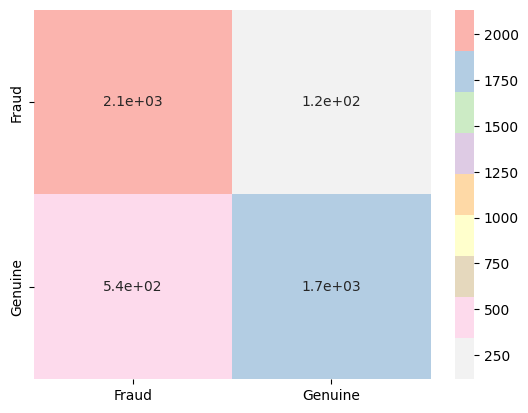

In [ ]:
sns.heatmap(logi_cm_new, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Genuine'],yticklabels=['Fraud' ,'Genuine'])

### Applying Naive Bayes on our under sampled dataset

In [ ]:
gnb = GaussianNB()
gnb.fit(X_trainN, y_trainN)

GaussianNB()

In [ ]:
gnb_new_training = gnb.score(X_trainN, y_trainN)
gnb_new_test = gnb.score(X_testN, y_testN)
print("Training accuracy of the model is {:.2f}".format(gnb_new_training))
print("Testing accuracy of the model is {:.2f}".format(gnb_new_test))

Training accuracy of the model is 0.81
Testing accuracy of the model is 0.82


In [ ]:
y_pred = gnb.predict(X_testN)
report = classification_report(y_testN, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_testN, y_pred, pos_label=1)
gnb_new_Precision = precision[1]
gnb_new_Recall = recall[1]
print('Precision:', gnb_new_Precision)
print('Recall:', gnb_new_Precision)

Precision: 0.9652686762778506
Recall: 0.9652686762778506


In [ ]:
predictions = gnb.predict(X_testN)
gnb_cm_new=confusion_matrix(predictions, y_testN)
print(gnb_cm_new)

[[2199  779]
 [  53 1473]]


<Axes: >

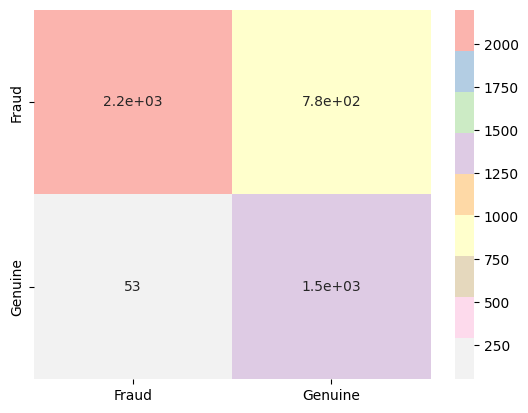

In [ ]:
sns.heatmap(gnb_cm_new, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Genuine'],yticklabels=['Fraud' ,'Genuine'])

### Accuracy Comparison of Three Models

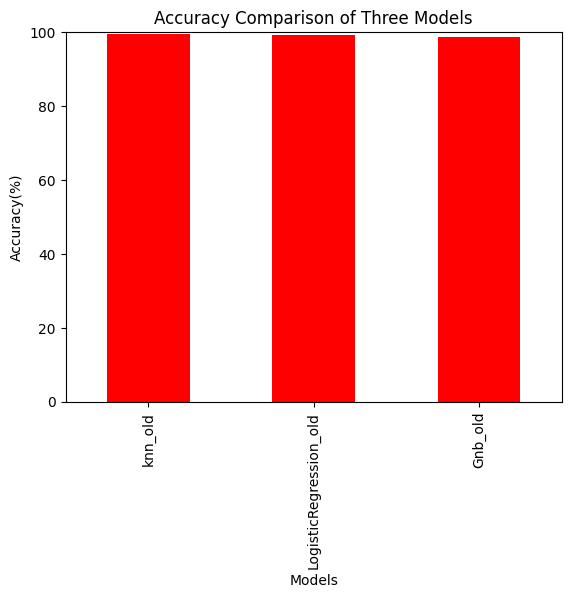

In [ ]:
accuracy = {'Model': ['knn_old', 'LogisticRegression_old', 'Gnb_old'],
        'Accuracy': [knn_old_test*100, logi_old_test_data_accuracy*100, gnb_old_test*100]}
df = pd.DataFrame(accuracy)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='red', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Accuracy Comparison of Three Models')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy(%)')
plt.show()

### Accuracy Comparison of Three Models using under sampled data

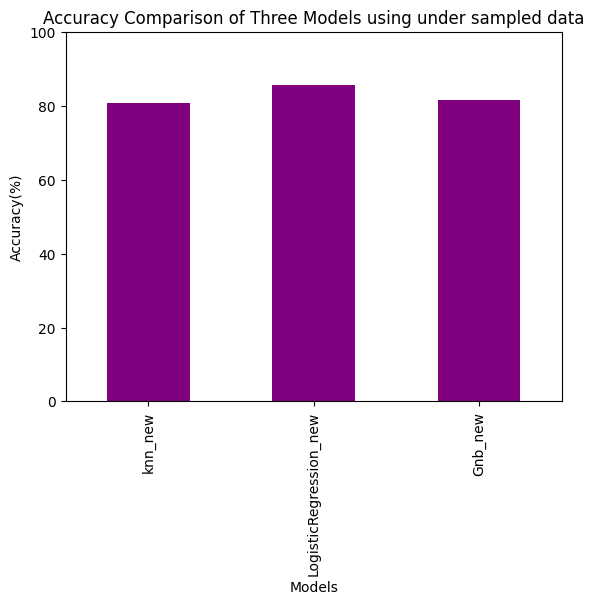

In [ ]:
accuracy = {'Model': ['knn_new', 'LogisticRegression_new', 'Gnb_new'],
        'Accuracy': [knn_new_test*100, logi_new_test_data_accuracy*100, gnb_new_test*100]}
df = pd.DataFrame(accuracy)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='purple', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Accuracy Comparison of Three Models using under sampled data')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy(%)')
plt.show()

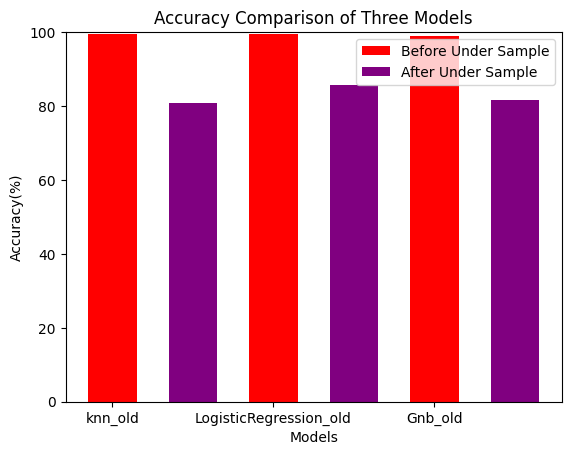

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# First graph
accuracy1 = {'Model': ['knn_old', 'LogisticRegression_old', 'Gnb_old'],
        'Accuracy': [knn_old_test*100, logi_old_test_data_accuracy*100, gnb_old_test*100]}
df1 = pd.DataFrame(accuracy1)

# Second graph
accuracy2 = {'Model': ['knn_new', 'LogisticRegression_new', 'Gnb_new'],
        'Accuracy': [knn_new_test*100, logi_new_test_data_accuracy*100, gnb_new_test*100]}
df2 = pd.DataFrame(accuracy2)

# Set bar width and spacing
bar_width = 0.3
space = 0.2

# Set x-axis positions for bars in the second set of data
x2 = np.arange(len(df2)) + bar_width + space

# Plot merged graph
plt.bar(np.arange(len(df1)), df1['Accuracy'], width=bar_width, color='red', label='Before Under Sample')
plt.bar(x2, df2['Accuracy'], width=bar_width, color='purple', label='After Under Sample')
plt.xticks(np.arange(len(df1)), df1['Model'])
plt.ylim([0, 100])
plt.title('Accuracy Comparison of Three Models')
plt.xlabel('Models')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

### Precision Comparison of Three Models

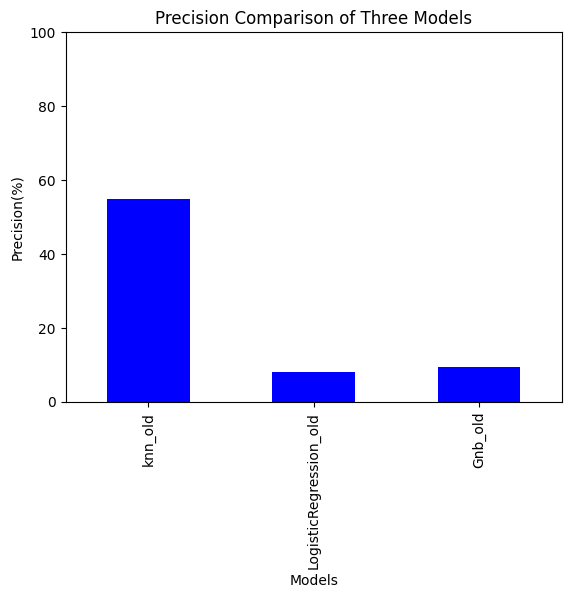

In [ ]:
accuracy = {'Model': ['knn_old', 'LogisticRegression_old', 'Gnb_old'],
        'Accuracy': [knn_old_Precision*100, logi_old_Precision*100, gnb_old_Precision*100]}
df = pd.DataFrame(accuracy)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='blue', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Precision Comparison of Three Models')
ax.set_xlabel('Models')
ax.set_ylabel('Precision(%)')
plt.show()

### Precision Comparison of Three Models using under sampled data

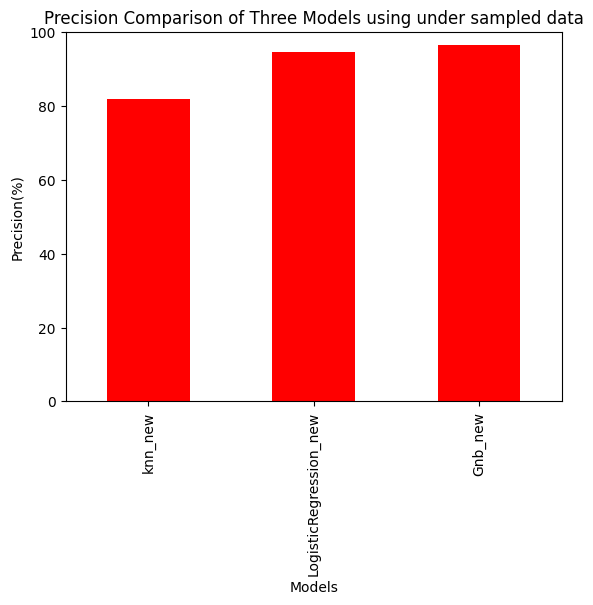

In [ ]:
accuracy = {'Model': ['knn_new', 'LogisticRegression_new', 'Gnb_new'],
        'Accuracy': [knn_new_Precision*100, logi_new_Precision*100, gnb_new_Precision*100]}
df = pd.DataFrame(accuracy)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='red', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Precision Comparison of Three Models using under sampled data')
ax.set_xlabel('Models')
ax.set_ylabel('Precision(%)')
plt.show()

### Recall Comparison of Three Models

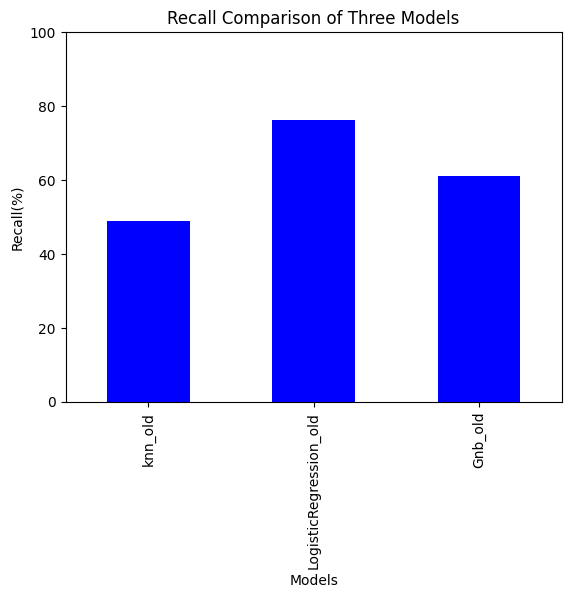

In [ ]:
accuracy = {'Model': ['knn_old', 'LogisticRegression_old', 'Gnb_old'],
        'Accuracy': [knn_old_Recall*100, logi_old_Recall*100, gnb_old_Recall*100]}
df = pd.DataFrame(accuracy)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='blue', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Recall Comparison of Three Models')
ax.set_xlabel('Models')
ax.set_ylabel('Recall(%)')
plt.show()

### Recall Comparison of Three Models using under sampled data

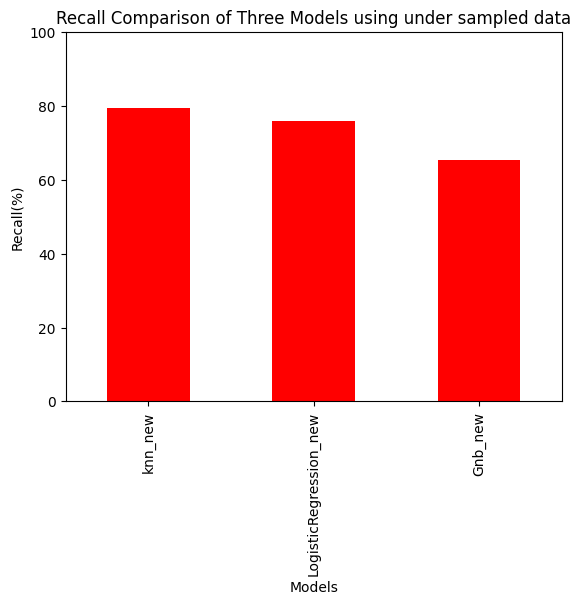

In [ ]:
accuracy = {'Model': ['knn_new', 'LogisticRegression_new', 'Gnb_new'],
        'Accuracy': [knn_new_Recall*100, logi_new_Recall*100, gnb_new_Recall*100]}
df = pd.DataFrame(accuracy)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='red', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Recall Comparison of Three Models using under sampled data')
ax.set_xlabel('Models')
ax.set_ylabel('Recall(%)')
plt.show()

### Oversampaling the Dataset

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
knn_over_training = accuracy_score(y_resampled, knn.predict(X_resampled))
knn_over_test = accuracy_score(y_test, y_pred)
print(f'Training Accuracy: {knn_over_training}')
print(f'Testing Accuracy: {knn_over_test}')

Training Accuracy: 1.0
Testing Accuracy: 0.9914268013357224


In [ ]:
report = classification_report(y_test, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, pos_label=1)
knn_over_Precision = precision[1]
knn_over_Recall = recall[1]
print('Precision:', knn_old_Precision)
print('Recall:', knn_old_Recall)
print(f"F1: {f1[0]}")

Precision: 0.547713717693837
Recall: 0.48934280639431615
F1: 0.9956801357486578


In [ ]:
knn_over_cm = confusion_matrix(y_test, y_pred)
print(knn_over_cm)

[[384340   2411]
 [   924   1328]]


<Axes: >

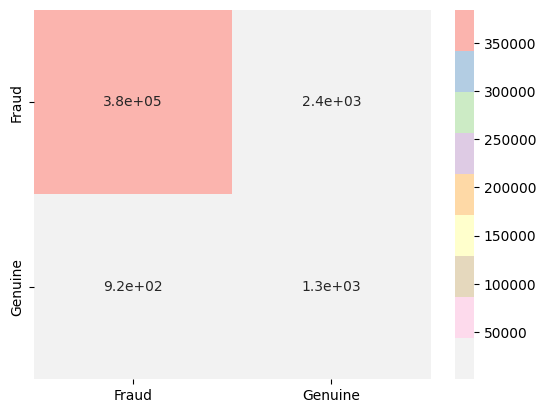

In [ ]:
sns.heatmap(knn_over_cm, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Genuine'],yticklabels=['Fraud' ,'Genuine'])

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_resampled,y_resampled)

LogisticRegression(max_iter=1000)

In [ ]:
X_train_prediction = model.predict(X_resampled)
logi_old_training_data_accuracy = accuracy_score(X_train_prediction, y_resampled)
X_test_prediction = model.predict(X_test)
logi_old_test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy on Training data : ', logi_old_training_data_accuracy)
print('Accuracy score on Test Data : ', logi_old_test_data_accuracy)

Accuracy on Training data :  0.8563786404969759
Accuracy score on Test Data :  0.9475222556124245


In [ ]:
report = classification_report(y_test, X_test_prediction)
precision, recall, f1, support = precision_recall_fscore_support(y_test, X_test_prediction, pos_label=1)
logi_old_Precision = precision[1]
logi_old_Recall = recall[1]
print('Precision:', logi_old_Precision)
print('Recall:', logi_old_Recall)

Precision: 0.07954440225946847
Recall: 0.7628774422735346


In [ ]:
logi_cm_old = confusion_matrix(y_test, X_test_prediction)
print(logi_cm_old)

[[366871  19880]
 [   534   1718]]


<Axes: >

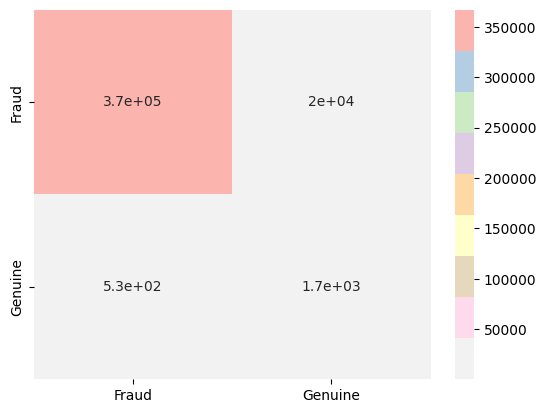

In [ ]:
sns.heatmap(logi_cm_old, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Genuine'],yticklabels=['Fraud' ,'Genuine'])

In [ ]:
gnb = GaussianNB()
gnb.fit(X_resampled, y_resampled)

GaussianNB()

In [ ]:
gnb_old_training = gnb.score(X_resampled, y_resampled)
gnb_old_test = gnb.score(X_test, y_test)
print("Training accuracy of the model is {:.2f}".format(gnb_old_training))
print("Testing accuracy of the model is {:.2f}".format(gnb_old_test))

Training accuracy of the model is 0.79
Testing accuracy of the model is 0.96


In [ ]:
y_pred = gnb.predict(X_test)
report = classification_report(y_test, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, pos_label=1)
gnb_old_Precision = precision[1]
gnb_old_Recall = recall[1]
print('Precision:', gnb_old_Precision)
print('Recall:', gnb_old_Recall)

Precision: 0.09454345283148696
Recall: 0.6101243339253997


In [ ]:
predictions = gnb.predict(X_test)
gnb_old_new=confusion_matrix(predictions, y_test)
print(gnb_old_new)

[[373592    878]
 [ 13159   1374]]


<Axes: >

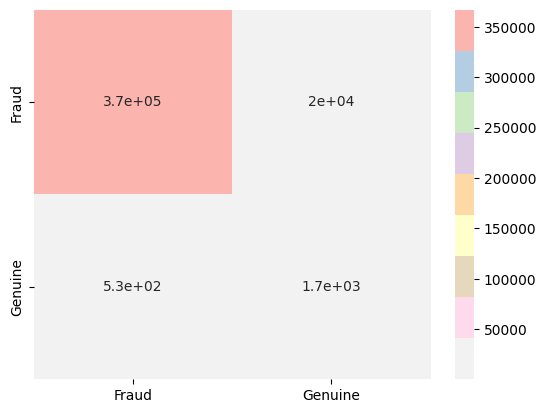

In [ ]:
sns.heatmap(logi_cm_old, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Genuine'],yticklabels=['Fraud' ,'Genuine'])

In [ ]:
X_resampled.shape

(1804836, 12)

In [ ]:
X_test.shape

(389003, 12)

In [ ]:
X_trainN.shape

(10508, 12)